In [1]:
import pandas as pd

# Load sentiment datasets
df_sent1 = pd.read_csv('/content/sentiment_analysis.csv')
df_sent2 = pd.read_csv('/content/test.csv', encoding='latin-1') # Specify encoding as 'latin-1' or another appropriate encoding

# Load emotion datasets
df_emot1 = pd.read_csv('//content/sentimentdataset.csv')
df_emot2 = pd.read_csv('/content/tweet_emotion_data.csv')

# Clean sentiment datasets: keep text, sentiment, time_of_tweet; rename columns to lowercase
# Print the columns of df_sent1 to check their actual names
print(df_sent1.columns)
df_sent1 = df_sent1.rename(columns=str.lower)[['text', 'time of tweet', 'sentiment']].rename(columns={'label': 'sentiment'}) # Use actual column names after converting to lowercase, like 'time of tweet' instead of 'Time of Tweet'
df_sent2 = df_sent2.rename(columns=str.lower)[['text', 'time of tweet', 'sentiment']].rename(columns={'label': 'sentiment'}) # Use actual column names after converting to lowercase

# Clean emotion datasets: keep text and emotion; rename columns to lowercase
df_emot1 = df_emot1.rename(columns=str.lower)[['text', 'emotion']].rename(columns={'label': 'emotion'})
df_emot2 = df_emot2.rename(columns=str.lower)[['text', 'emotion']].rename(columns={'label': 'emotion'})

# Merge datasets
sentiment_df = pd.concat([df_sent1, df_sent2], ignore_index=True)
emotion_df = pd.concat([df_emot1, df_emot2], ignore_index=True)

# Save to CSV
sentiment_df.to_csv('/content/sentiment_file.csv', index=False)
emotion_df.to_csv('/content/emotion_file.csv', index=False)

Index(['Year', 'Month', 'Day', 'time of tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')


In [2]:

df = pd.read_csv('/content/emotion_file.csv')

# Count missing values in each column
print("Missing values:\n", df.isnull().sum())

# Show rows with any missing values
missing_rows = df[df.isnull().any(axis=1)]
print("\nRows with missing values:\n", missing_rows)
print("Empty text rows:\n", df[df['text'].str.strip() == ''])

Missing values:
 text       0
emotion    0
dtype: int64

Rows with missing values:
 Empty DataFrame
Columns: [text, emotion]
Index: []
Empty text rows:
 Empty DataFrame
Columns: [text, emotion]
Index: []


In [3]:
data = pd.read_csv('/content/sentiment_file.csv')

# Count missing values in each column
print("Missing values:\n", data.isnull().sum())

# Show rows with any missing values
missing_rows = data[data.isnull().any(axis=1)]
print("\nRows with missing values:\n", missing_rows)
print("Empty text rows:\n", data[data['text'].str.strip() == ''])

Missing values:
 text             0
time of tweet    0
sentiment        0
dtype: int64

Rows with missing values:
 Empty DataFrame
Columns: [text, time of tweet, sentiment]
Index: []
Empty text rows:
 Empty DataFrame
Columns: [text, time of tweet, sentiment]
Index: []


In [4]:
print("Unique sentiments:", data['sentiment'].unique())
print("Unique emotions:", df['emotion'].unique())


Unique sentiments: ['positive' 'negative' 'neutral']
Unique emotions: [' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom     

In [5]:
# 1. Remove duplicates
df.drop_duplicates(inplace=True)

# 2. Remove outliers based on text length
df['text_length'] = df['text'].str.len()
df = df[(df['text_length'] > 10) & (df['text_length'] < 300)]
df.drop(columns='text_length', inplace=True)

# 3. Standardize emotion labels (strip and lowercase)
df['emotion'] = df['emotion'].str.strip().str.lower()

# 4. Map similar emotions to unified labels (optional)
emotion_map = {
    'joy': 'happy', 'happiness': 'happy', 'elation': 'happy', 'contentment': 'happy',
    'sadness': 'sad', 'grief': 'sad', 'sorrow': 'sad', 'despair': 'sad', 'melancholy': 'sad',
    'anger': 'anger', 'frustration': 'anger', 'rage': 'anger',
    'fear': 'fear', 'anxiety': 'fear', 'nervousness': 'fear',
    'surprise': 'surprise', 'shock': 'surprise',
    'love': 'love', 'affection': 'love', 'adoration': 'love',
}
df['emotion'] = df['emotion'].replace(emotion_map)


<ipython-input-5-e86c06ae7dd7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='text_length', inplace=True)
<ipython-input-5-e86c06ae7dd7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotion'] = df['emotion'].str.strip().str.lower()
<ipython-input-5-e86c06ae7dd7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [6]:
# 1. Remove duplicates
data.drop_duplicates(inplace=True)

# 2. Convert 'time of tweet' to datetime
data['time of tweet'] = pd.to_datetime(data['time of tweet'], errors='coerce')
data.dropna(subset=['time of tweet'], inplace=True)

# 3. Standardize sentiment labels
data['sentiment'] = data['sentiment'].str.strip().str.lower()

# 4. (Optional) Encode sentiments for modeling
from sklearn.preprocessing import LabelEncoder
sentiment_encoder = LabelEncoder()
data['sentiment_encoded'] = sentiment_encoder.fit_transform(data['sentiment'])


<ipython-input-6-894854fe909b>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time of tweet'] = pd.to_datetime(data['time of tweet'], errors='coerce')


In [8]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from collections import defaultdict

# Load data
sentiment_data = pd.read_csv('/content/sentiment_file.csv')
emotion_data = pd.read_csv('/content/emotion_file.csv')

# Define emotion categories
emotion_category_map = {
    'happy': ['joy', 'happiness', 'elation', 'contentment', 'serenity', 'gratitude', 'hope', 'empowerment', 'compassion',
        'tenderness', 'arousal', 'enthusiasm', 'fulfillment', 'reverence', 'overjoyed', 'inspiration', 'motivation',
        'amusement', 'satisfaction', 'blessed', 'appreciation', 'confidence',
        'accomplishment', 'wonderment', 'optimism', 'pride', 'playfuljoy', 'mindfulness', 'dreamchaser', 'elegance',
        'whimsy', 'pensive', 'harmony', 'creativity', 'radiance', 'rejuvenation', 'adventure', 'freedom',
        'dazzle', 'adrenaline', 'artisticburst', 'culinaryodyssey', 'resilience', 'spark', 'marvel', 'positivity',
        'kindness', 'friendship', 'success', 'exploration', 'amazement', 'romance', 'captivation', 'tranquility',
        'grandeur', 'emotion', 'energy', 'celebration', 'charm', 'ecstasy', 'colorful', 'connection', 'iconic',
        'journey', 'engagement', 'touched', 'suspense', 'triumph', 'heartwarming', 'solace', 'breakthrough',
        'joy in baking', 'envisioning history', 'imagination', 'vibrancy', 'mesmerizing', 'culinary adventure',
        'winter magic', 'thrilling journey', "nature's beauty", 'celestial wonder', 'creative inspiration',
        'runway creativity', "ocean's freedom", 'whispers of the past', 'playful', 'free-spirited', 'inspired', 'confident'],
      # (keep your full list of emotions here)
    'sad': ['sadness', 'grief', 'sorrow', 'despair', 'melancholy', 'disappointed', 'loneliness', 'regret', 'boredom',
        'isolation', 'lostlove', 'exhaustion', 'darkness', 'desperation', 'ruins', 'desolation', 'loss', 'heartache',
        'solitude', 'heartbreak', 'betrayal', 'suffering', 'disappointment', 'emotionalstorm'],

    'anger': [ 'anger', 'frustration', 'rage', 'resentment', 'envy', 'hate', 'jealousy', 'envious', 'bitterness', 'bitter',
        'dismissive','nonsence'],

    'fear': [ 'fear', 'anxiety', 'terror', 'panic', 'scared', 'afraid', 'horror', 'worry', 'dread',
    'phobia', 'paranoia', 'unease', 'intimidation', 'fright', 'startled', 'nervous', 'shocked',
    'overwhelmed', 'helpless', 'threatened', 'insecure', 'uncertain', 'apprehension', 'alarmed', 'alarm',
    'doom', 'spooked', 'creepy'],

    'surprise': ['surprise', 'astonishment', 'shock', 'amazement', 'startled', 'stunned', 'speechless',
    'unexpected', 'unbelievable', 'wow', 'no way', 'unimaginable', 'mindblown', 'unthinkable',
    'gasp', 'incredible', 'staggering', 'jaw-dropping', 'baffled', 'taken aback', 'surprise', 'shock', 'thrill', 'wonder'],

    'disgust': ['disgust', 'repulsion', 'revulsion', 'nausea', 'loathing', 'distaste', 'abhorrence', 'contempt',
    'aversion', 'gross', 'revolting', 'vile', 'repugnant', 'detestable', 'disdain', 'sickened', 'nauseated',
    'recoil', 'cringe', 'offensive', 'obnoxious', 'horrible', 'displeasure', 'nasty', 'filthy', 'dirty',
    'ugly', 'unsanitary', 'rotten', 'putrid'],

    'neutral': ['neutral', 'indifference', 'numbness', 'confusion', 'acceptance', 'contemplation', 'ambivalence', 'sympathy',
        'reflection', 'pressure', 'renewed effort', 'miscalculation', 'challenge', 'determination']
}

# Create reverse mapping for flat emotion to category lookup
flat_emotion_to_category = {emotion: category for category, emotions in emotion_category_map.items() for emotion in emotions}

# Map the emotion categories to sentiment (positive, negative, neutral)
sentiment_emotion_mapping = {
    'positive': ['happy'],
    'negative': ['sad', 'anger', 'fear', 'disgust'],
    'neutral': ['surprise', 'neutral']
}

# Flatten to map emotion category to sentiment
category_to_sentiment = {}
for sentiment, categories in sentiment_emotion_mapping.items():
    for category in categories:
        category_to_sentiment[category] = sentiment

# Normalize and map emotion labels
def map_emotion_label(emotion):
    emotion = emotion.strip().lower()
    return flat_emotion_to_category.get(emotion, None)

def emotion_to_sentiment(category):
    return category_to_sentiment.get(category, 'unknown')

emotion_data['emotion'] = emotion_data['emotion'].astype(str)
emotion_data['emotion_mapped'] = emotion_data['emotion'].apply(map_emotion_label)
emotion_data.dropna(subset=['emotion_mapped'], inplace=True)

# Train/Test Split
X_emotion_train, X_emotion_test, y_emotion_train, y_emotion_test = train_test_split(
    emotion_data['text'], emotion_data['emotion_mapped'], test_size=0.2, random_state=42
)

# Hyperparameter tuning for emotion model
emotion_pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C': [0.1, 1, 10], 'logisticregression__solver': ['liblinear']}
emotion_grid = GridSearchCV(emotion_pipeline, param_grid, cv=3, scoring='f1_macro')
emotion_grid.fit(X_emotion_train, y_emotion_train)

# Evaluate emotion model
y_emotion_pred = emotion_grid.predict(X_emotion_test)
print("\nEmotion Classification Report:\n", classification_report(y_emotion_test, y_emotion_pred))

# Predict emotion on sentiment data
sentiment_data['predicted_emotion'] = emotion_grid.predict(sentiment_data['text'])
sentiment_data['predicted_sentiment_from_emotion'] = sentiment_data['predicted_emotion'].apply(emotion_to_sentiment)

# Normalize sentiment labels
sentiment_data['sentiment'] = sentiment_data['sentiment'].astype(str).str.strip().str.lower()

# Train/Test Split for sentiment model
X_sent_train, X_sent_test, y_sent_train, y_sent_test = train_test_split(
    sentiment_data['text'], sentiment_data['sentiment'], test_size=0.2, random_state=42
)

# Hyperparameter tuning for sentiment model
sentiment_pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
sentiment_grid = GridSearchCV(sentiment_pipeline, param_grid, cv=3, scoring='f1_macro')
sentiment_grid.fit(X_sent_train, y_sent_train)

# Evaluate sentiment model
y_sent_pred = sentiment_grid.predict(X_sent_test)
print("\nSentiment Classification Report:\n", classification_report(y_sent_test, y_sent_pred))

# Predict sentiment on emotion data
emotion_data['predicted_sentiment'] = sentiment_grid.predict(emotion_data['text'])

# Save results
sentiment_data.to_csv('sentiment_with_emotion_and_sentiment.csv', index=False)
emotion_data.to_csv('emotion_with_predicted_sentiment.csv', index=False)

print("\n✅ Predictions complete. Results saved to CSV.")


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Emotion Classification Report:
               precision    recall  f1-score   support

       anger       0.76      0.83      0.79       413
     disgust       0.00      0.00      0.00         1
        fear       0.00      0.00      0.00         1
       happy       0.69      0.73      0.71       322
     neutral       1.00      0.38      0.55        16
         sad       0.72      0.61      0.66       271
    surprise       0.00      0.00      0.00         2

    accuracy                           0.73      1026
   macro avg       0.45      0.36      0.39      1026
weighted avg       0.73      0.73      0.72      1026


Sentiment Classification Report:
               precision    recall  f1-score   support

    negative       0.58      0.57      0.57       215
     neutral       0.60      0.67      0.63       332
    positive       0.74      0.65      0.69       260

    accuracy                           0.63       807
   macro avg       0.64      0.63      0.63       807
weighted 

In [11]:
import pandas as pd

# Step 1: Load both datasets
emotion_df = pd.read_csv('/content/emotion_with_predicted_sentiment.csv')
sentiment_df = pd.read_csv('/content/sentiment_with_emotion_and_sentiment.csv')

# Step 2: Strip any leading/trailing spaces in the 'text' columns
emotion_df['text'] = emotion_df['text'].str.strip()
sentiment_df['text'] = sentiment_df['text'].str.strip()

# Step 3: Check for missing values in 'text' columns and drop them
emotion_df.dropna(subset=['text'], inplace=True)
sentiment_df.dropna(subset=['text'], inplace=True)

# Step 4: Merge the two datasets on 'text' using outer join to include all rows (even unmatched ones)
combined_df = pd.merge(emotion_df, sentiment_df, on='text', how='outer')

# Step 5: Combine the 'emotion' and 'predicted_emotion' columns
combined_df['emotion_combined'] = combined_df['emotion'].fillna('') + ' ' + combined_df['predicted_emotion'].fillna('')
combined_df['emotion_combined'] = combined_df['emotion_combined'].str.strip()

# Step 6: Combine the 'sentiment' and 'predicted_sentiment' columns
combined_df['sentiment_combined'] = combined_df['sentiment'].fillna('') + ' ' + combined_df['predicted_sentiment'].fillna('')
combined_df['sentiment_combined'] = combined_df['sentiment_combined'].str.strip()

# Step 7: Drop the old columns that are now merged
combined_df.drop(columns=['emotion', 'predicted_emotion', 'sentiment', 'predicted_sentiment'], inplace=True)

# Step 8: Optionally, clean up any unwanted or duplicate columns from the other dataset
combined_df = combined_df[['text', 'time of tweet', 'emotion_combined', 'sentiment_combined']]

# Step 9: Save the result to a new CSV file
combined_df.to_csv('/content/combined_sentiment_emotion.csv', index=False)

# Step 10: Display the first few rows to verify the merge
print("✅ Combined file saved to: /content/combined.csv")
print("\n🔍 Preview of Combined Data:")
print(combined_df.head())

# Check the number of rows and preview combined data
print(f"Total rows in the combined dataset: {len(combined_df)}")


✅ Combined file saved to: /content/combined.csv

🔍 Preview of Combined Data:
                                                text time of tweet  \
0  # ISIS REFERENCES SCRUBBED?  Federal complaint...           NaN   
1  #2 complained then while his head and then cal...           NaN   
2                    #3breakupwords you have changed         night   
3                       #3wordsaftersex it hurts now          noon   
4  #ATO hacking into your phone calls and text me...           NaN   

  emotion_combined sentiment_combined  
0            anger            neutral  
1         optimism            neutral  
2            anger            neutral  
3            anger           negative  
4            anger           negative  
Total rows in the combined dataset: 9162


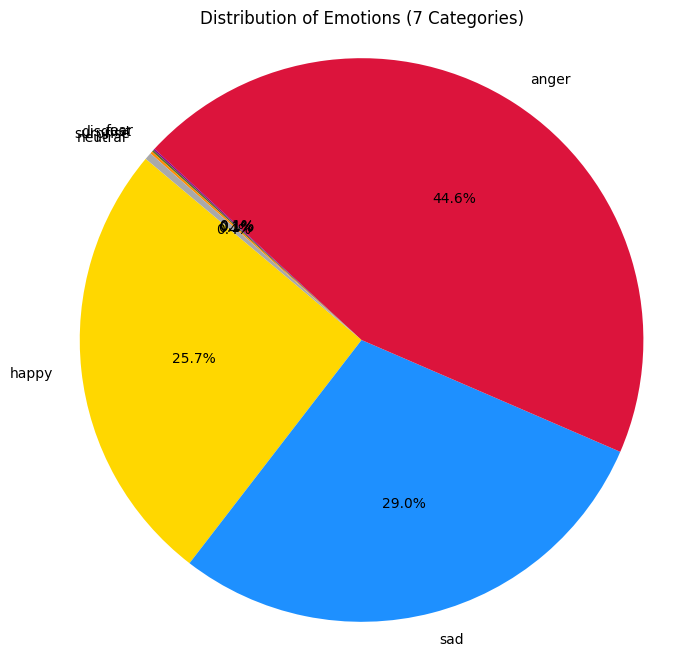

In [12]:
import matplotlib.pyplot as plt

emotion_colors = {
    'happy': '#FFD700',      # gold
    'sad': '#1E90FF',        # blue
    'anger': '#DC143C',      # red
    'fear': '#8B008B',       # purple
    'disgust': '#556B2F',    # greenish
    'surprise': '#FF8C00',   # orange
    'neutral': '#A9A9A9'     # grey
}

emotion_counts = df['emotion'].value_counts().reindex(emotion_colors.keys()).fillna(0)

plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%',
        colors=[emotion_colors[e] for e in emotion_counts.index], startangle=140)
plt.title('Distribution of Emotions (7 Categories)')
plt.axis('equal')
plt.show()


<ipython-input-13-f43333e33294>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values,


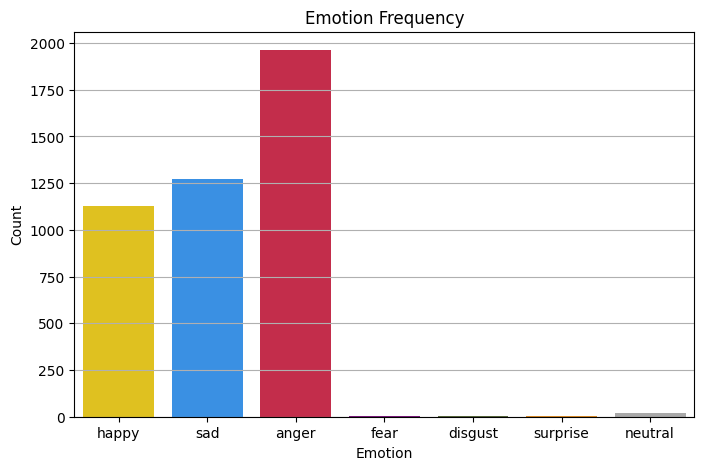

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values,
            palette=emotion_colors)
plt.title('Emotion Frequency')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


<ipython-input-14-5faf5ec21307>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')


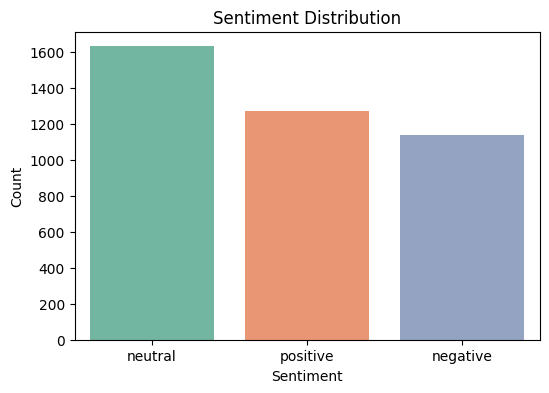

In [14]:
# Count the occurrences of each sentiment
sentiment_counts = data['sentiment'].value_counts()
# Plot the sentiment distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Sentiment Distribution')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()



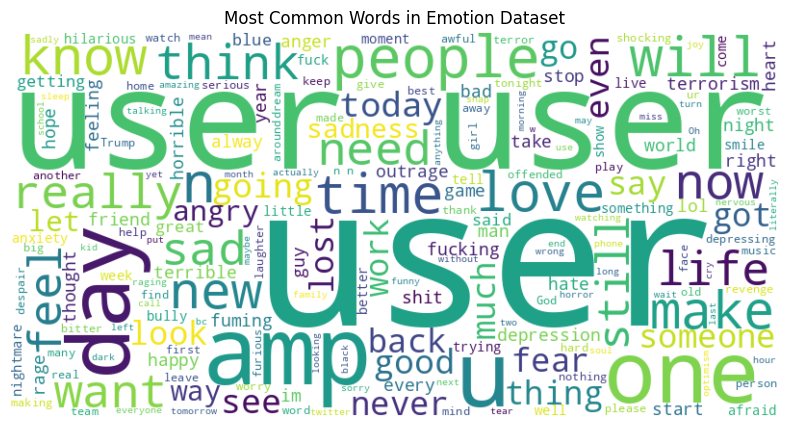

In [16]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Import the WordCloud class

# Combine all the text data for the word cloud
text_combined = ' '.join(df['text'].dropna().astype(str))

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Emotion Dataset')
plt.show()